## Importing DataFrames


#### Importing the dataframes from URL provided. Making 2 dataframes, one for the weekly visits and the other one for cinema summary.

In [2]:
import pandas as pd
customer_data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001352752/CinemaWeeklyVisitors.csv', index_col=0)
customer_data.index = pd.to_datetime(customer_data.index)

CinemaAge = pd.read_csv('https://tinyurl.com/ChrisCoDV/001352752/CinemaAge.csv')
CinemaCapacity = pd.read_csv('https://tinyurl.com/ChrisCoDV/001352752/CinemaCapacity.csv')
CinemaMarketing = pd.read_csv('https://tinyurl.com/ChrisCoDV/001352752/CinemaMarketing.csv ')
CinemaOverheads = pd.read_csv('https://tinyurl.com/ChrisCoDV/001352752/CinemaOverheads.csv')
CinemaSpend = pd.read_csv('https://tinyurl.com/ChrisCoDV/001352752/CinemaSpend.csv')

cinema_data = pd.merge(CinemaAge,CinemaCapacity, on="Id")
cinema_data = pd.merge(cinema_data,CinemaMarketing, on="Id")
cinema_data = pd.merge(cinema_data,CinemaOverheads, on="Id")
cinema_data = pd.merge(cinema_data,CinemaSpend, on="Id")


print(customer_data.tail())
print(customer_data.describe())


            SDT   VPG  TVJ  BQV  CWN  UDD   WVA  WBK  WQW  TPY  ...  YCI  ZQL  \
Date                                                            ...             
2022-11-29  250  1091  281  180  234  339   979  552  204  453  ...  124    0   
2022-12-06  141  1059  317  119  239  304   677  548  243  457  ...  119    0   
2022-12-13  315  1054  273   40  241  315   987  546  196  473  ...  117    0   
2022-12-20  195  1000  326  196  158  400  1020  526  175  445  ...  121    0   
2022-12-27  231   991  350   67  138  377   834  554  224  503  ...  129    0   

             VJV  AKA  XQE  CCX  XEZ  YKT  ZWY  UVQ  
Date                                                 
2022-11-29  1178  115  151  248  153  174  150  341  
2022-12-06   853  191  141  192  155  153  120  341  
2022-12-13   943  174  157  147  172  158  158  417  
2022-12-20  1126   98  165  152  160  158  141  410  
2022-12-27   925  165  144  226  167  167  149  475  

[5 rows x 30 columns]
              SDT          VPG 

## Data visualisations

#### Importing Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Segmenting the weekly visit dataset based on visit counts.

In [4]:

categories = ['Top', 'Moderately', 'Less']
categories_selected = [[] for i in range(len(categories))]
for name in customer_data.columns:
    total_Hits = customer_data[name].sum()
    if total_Hits > 150000:
        category = 0
    elif total_Hits > 50000:
        category = 1
    else:
        category = 2
    categories_selected[category].append(name)

for i in range(len(categories)):
    print(categories[i] + ': ' + str(categories_selected[i]))



Top: ['VPG', 'WVA', 'YBS', 'VJV']
Moderately: ['TVJ', 'UDD', 'WBK', 'TPY', 'TJN', 'RPQ', 'SJE', 'UVQ']
Less: ['SDT', 'BQV', 'CWN', 'WQW', 'BKK', 'JJQ', 'WKL', 'XWO', 'BWF', 'ACQ', 'YCI', 'ZQL', 'AKA', 'XQE', 'CCX', 'XEZ', 'YKT', 'ZWY']


#### Adding a box plot for top visited venues

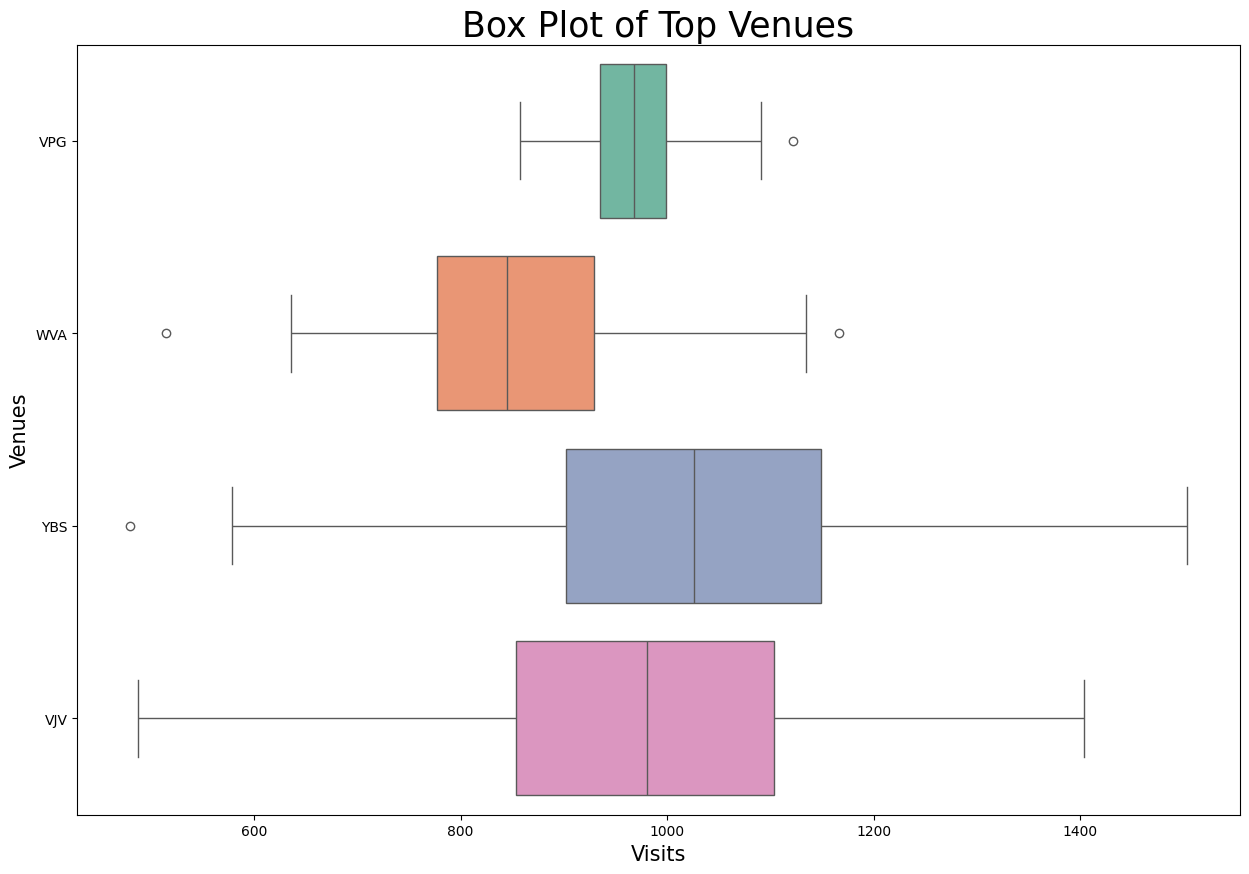

In [5]:
selected_venues = ['VPG', 'WVA', 'YBS', 'VJV']
plt.figure(figsize=(15,10))
sns.boxplot(data=customer_data[selected_venues], orient='h',palette='Set2')
plt.title('Box Plot of Top Venues', fontsize=25)
plt.xlabel('Visits', fontsize=15)
plt.ylabel('Venues', fontsize=15)
plt.show()

#### Adding a line chart for top visited venues to present the fluctuations of the venues with seasonal changes.

             VPG  WVA   YBS   VJV
Date                             
2019-01-01   970  832  1140  1343
2019-01-08   929  716  1020   992
2019-01-15  1000  959  1312   903
2019-01-22   927  701  1087  1101
2019-01-29   953  825  1273  1083


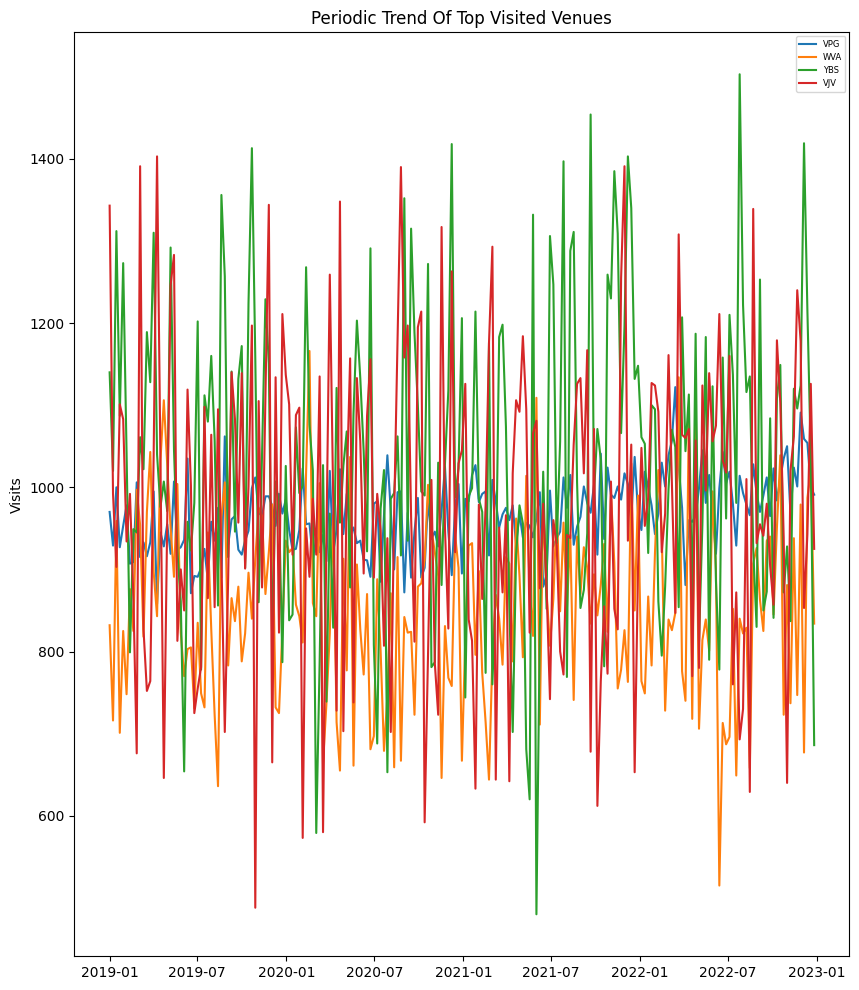

In [6]:

customer_data = customer_data.reindex(customer_data.sum().sort_values(ascending=False).index, axis=1)
top_venues = categories_selected[0]
print(customer_data[top_venues].head())
plt.figure(figsize=(10, 12))
for venue in top_venues:
    plt.plot(customer_data.index, customer_data[venue], label=venue)
plt.legend(fontsize=6)
plt.title('Periodic Trend Of Top Visited Venues', fontsize=12)
plt.ylabel('Visits', fontsize=10)
plt.show()


#### To understand the distribition of seating capacity, I added a histplot.

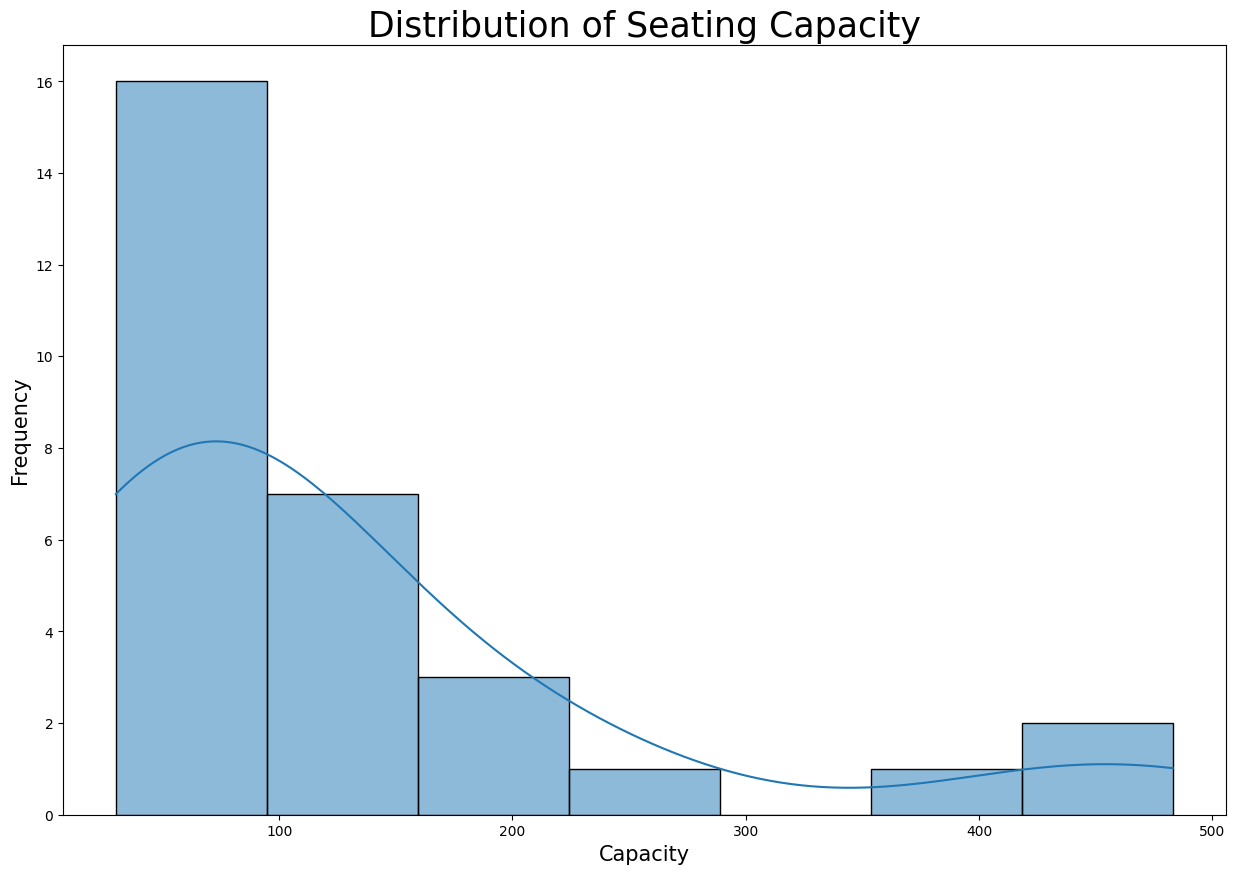

In [9]:
plt.figure(figsize=(15, 10))
sns.histplot(cinema_data['Seating capacity'], kde=True)
plt.title('Distribution of Seating Capacity', fontsize= 25)
plt.xlabel('Capacity', fontsize = 15)
plt.ylabel('Frequency', fontsize= 15)
plt.show()

#### Out of all the categories, less visited venue category showed some correlation. Added a heat map to visualize the correlation coefficient with the help of color intensity.

            WQW  ACQ  XWO  YKT  XEZ  JJQ  XQE  ZWY  YCI  WKL  BWF  BKK  BQV  \
Date                                                                          
2019-01-01  154  180  177  165  151  151  156  103  101  121  216    0    0   
2019-01-08  220  175  160  190  164  157  155  165  126  110  191    0    0   
2019-01-15  204  128  181  133  162  150  146  164  124  119  165    0    0   
2019-01-22  191  194  152  179  155  154  149  151  122  126  164    0    0   
2019-01-29  157  223  150  160  143  150  166  179  128  120  204    0    0   

            ZQL  CCX  AKA  SDT  CWN  
Date                                 
2019-01-01  114    0    0    0    0  
2019-01-08  117    0    0    0    0  
2019-01-15  114    0    0    0    0  
2019-01-22  119    0    0    0    0  
2019-01-29  122    0    0    0    0  


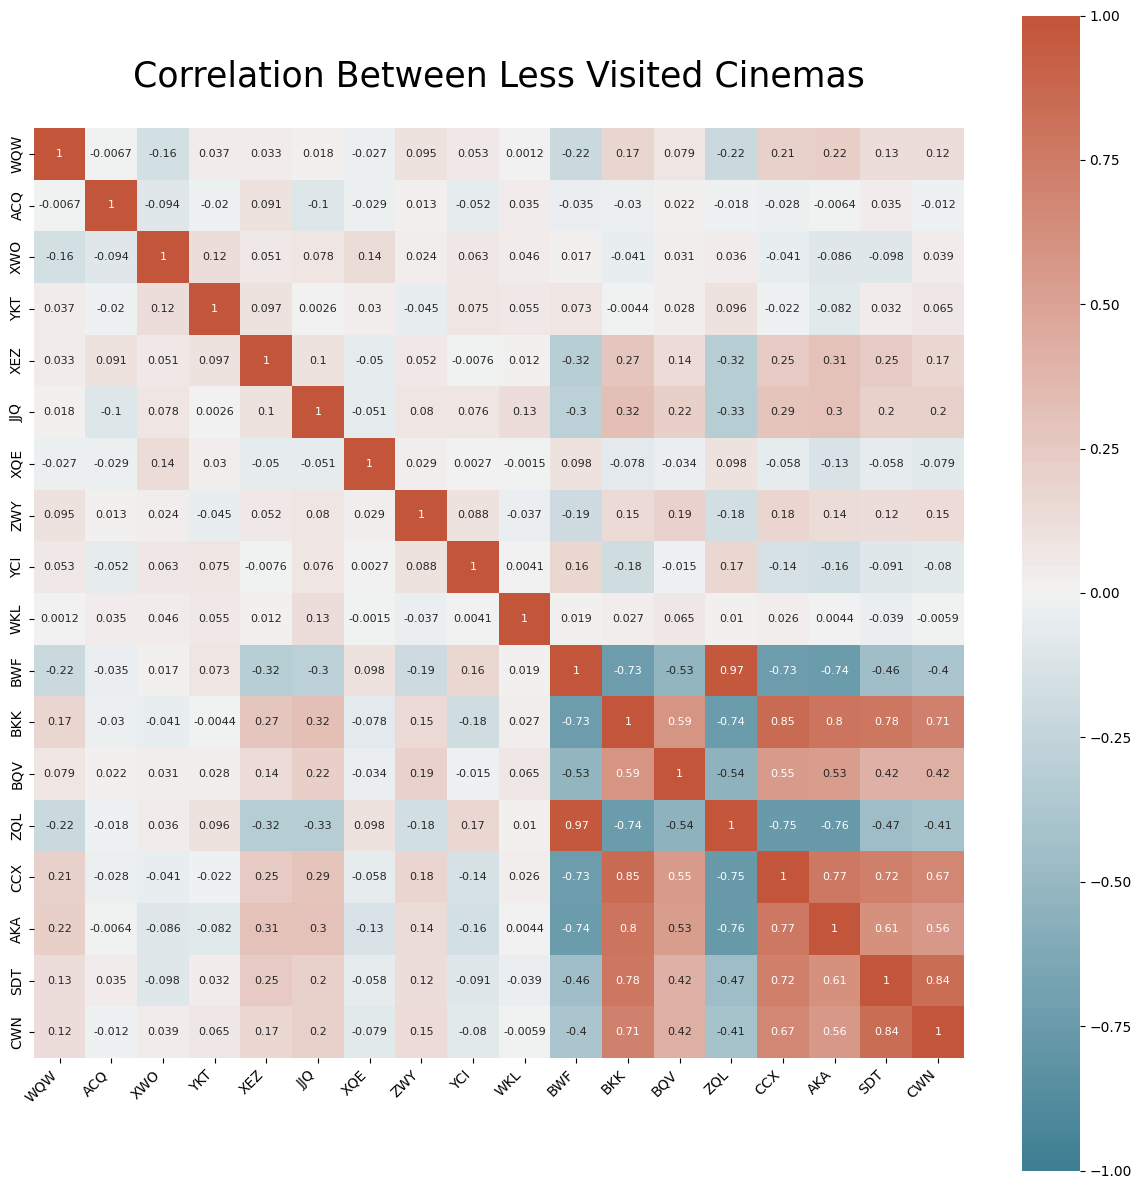

In [5]:

less_visited_venues = ['WQW', 'ACQ', 'XWO', 'YKT', 'XEZ', 'JJQ', 'XQE', 'ZWY', 'YCI', 'WKL', 'BWF', 'BKK', 'BQV', 'ZQL', 'CCX', 'AKA', 'SDT', 'CWN']

print(customer_data[less_visited_venues].head())

plt.figure(figsize=(15, 15))
correlation_matrix = customer_data[less_visited_venues].corr()
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True, annot_kws={"size": 8})
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Between Less Visited Cinemas', fontsize=25, pad=30)
plt.show()


#### Adding a dot plot to visualise the individual data on a graph.

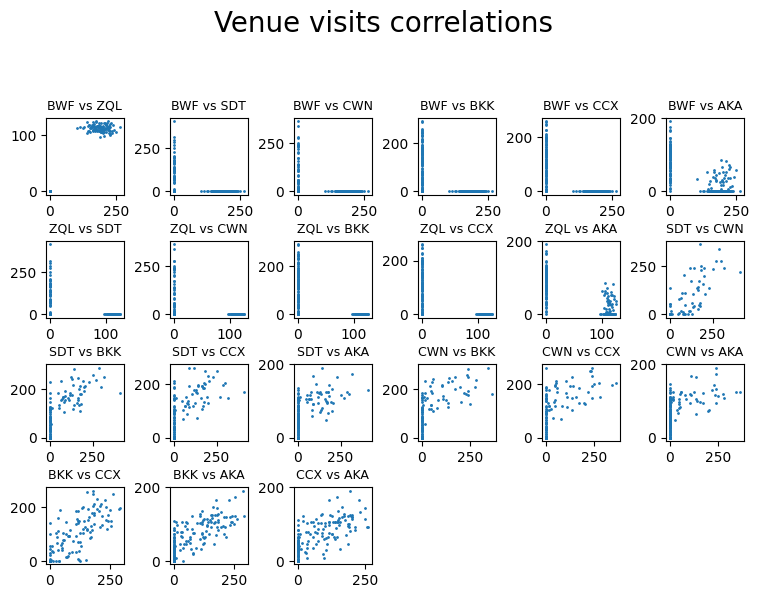

In [6]:
selected = ['BWF', 'ZQL', 'SDT', 'CWN', 'BKK', 'CCX', 'AKA']

counter = 1
fig = plt.figure(figsize=(9, 9))
fig.suptitle('Venue visits correlations', fontsize=20, position=(0.5, 1.0))
for i, name_i in enumerate(selected):
    for j in range(i + 1, len(selected)):
        name_j = selected[j]
        sub = fig.add_subplot(6, 6, counter)
        sub.set_title(name_i + ' vs ' + name_j, fontsize=9)
        sub.scatter(customer_data[name_i], customer_data[name_j], s=1)
        counter += 1
plt.subplots_adjust(wspace=0.6, hspace=0.6)
#plt.tight_layout()
plt.show()

#### To predict future values, adding an auto correlation chart among top and moderately visited venues.

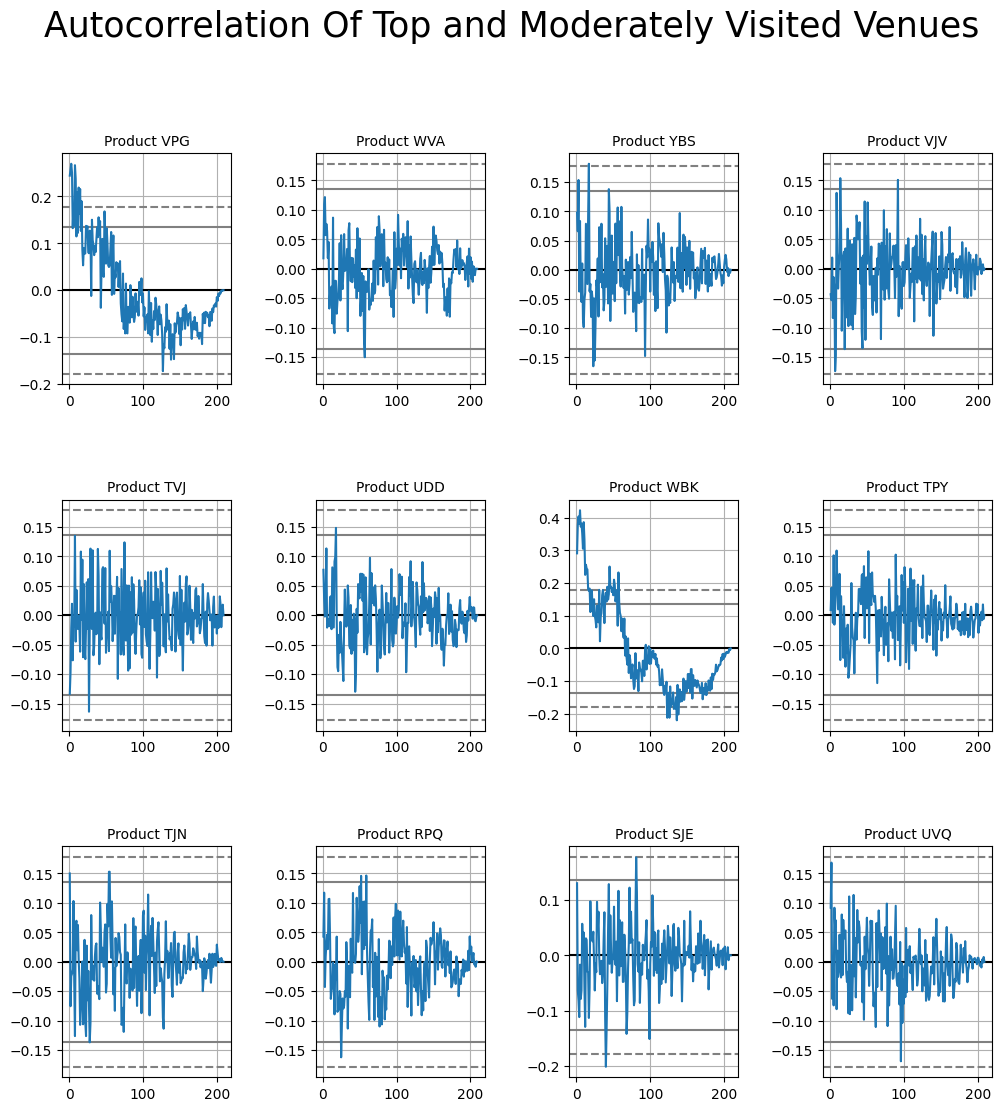

In [51]:

selected_venues = ['VPG', 'WVA', 'YBS', 'VJV', 'TVJ', 'UDD', 'WBK', 'TPY', 'TJN', 'RPQ', 'SJE', 'UVQ']

selected_columns = [name for name in customer_data[selected_venues].columns if not customer_data[selected_venues][name].dropna().empty]

num_plots = len(selected_columns)
num_cols = 4
num_rows = -(-num_plots // num_cols) 

fig, axes = plt.subplots(figsize=(12, 12), nrows=num_rows, ncols=num_cols)
fig.suptitle('Autocorrelation Of Top and Moderately Visited Venues', fontsize=25, position=(0.5, 1.0))

for i, name in enumerate(selected_columns):
    row = i // num_cols
    col = i % num_cols
    autocorrelation = pd.plotting.autocorrelation_plot(customer_data[selected_venues][name], ax=axes[row, col])
    autocorrelation.set_title('Product ' + name, fontsize=10)
    autocorrelation.xaxis.label.set_visible(False)
    autocorrelation.yaxis.label.set_visible(False)
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


In [8]:
import plotly.graph_objects as go

selected_venues = ['VPG', 'WVA', 'YBS', 'VJV']

fig = go.Figure()
for venue in selected_venues:
    fig.add_trace(go.Scatter(x=customer_data.index, y=customer_data[venue], mode='lines', name=venue))

fig.update_layout(
    title='Top Visited Venues',
    xaxis_title='Date',
    yaxis_title='Visits',
    autosize=False,
    width=600,
    height=600,
)

fig.show()


In [9]:
import holoviews as hv
import hvplot.pandas 
plot = customer_data.corr().hvplot.heatmap(
    frame_height=400, frame_width=400,
    title='Venue correlations',
    rot=90, cmap='coolwarm'
).opts(invert_yaxis=True, clim=(-1, 1))
hv.extension('bokeh')
plot

:HeatMap   [columns,index]   (value)